In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
import skimage.io as io
import skimage.transform as tr
import skimage.color
import dask.array as da
from glob import glob
from dask.array.image import imread
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [127]:
import numpy as np

arr1 = np.zeros((224,224,1))
arr2 = np.zeros((224,224,1))
arr3 = np.zeros((224,224,1))

arr = np.concatenate([arr1,arr2,arr3], axis=2)

print(arr.shape)

(224, 224, 3)


(224, 224, 3)
(224, 224, 1)


/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


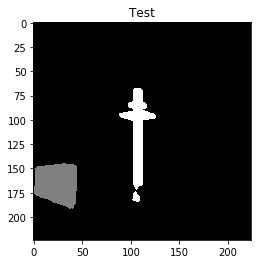

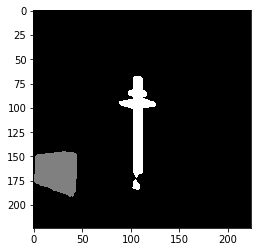

(224, 224, 2)


<function matplotlib.pyplot.show(*args, **kw)>

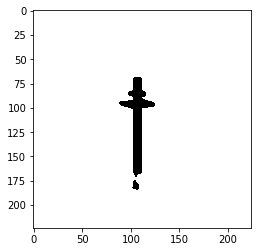

In [30]:
from skimage import img_as_ubyte

def showImage(img, title=None, cmap=None):
    
    if (title != None):
        plt.title(title)
    plt.imshow(img[:,:,0], cmap = cmap)
    plt.show()    


def showImageFromArray(arr, i, title=None, cmap=None):
    showImage(arr[i],title,cmap)


size = (224,224,1)
img = io.imread('/home/dan/Desktop/Datenset_TowerBuilding/test/masks/data/screenshot4.png')
img = tr.resize(img, size)
img_as_ubyte(img)

img2 = io.imread('/home/dan/Desktop/Datenset_TowerBuilding/test/masks/data/screenshot18.png')
img2 = tr.resize(img2, size)
img3 = io.imread('/home/dan/Desktop/Datenset_TowerBuilding/test/masks/data/screenshot19.png')
img3 = tr.resize(img3, size)

arr = np.concatenate([img,img2, img3], axis = 2)

print (arr.shape)

images = np.split(arr,3,axis=2)
print(images[2].shape)
showImageFromArray(images, 2, 'Test', cmap='gray')
showImage(images[2], cmap='gray')

teast = tf.keras.utils.to_categorical(images[2],2)
print(teast.shape)

plt.imshow(teast[:,:,0], cmap='gray')
plt.show

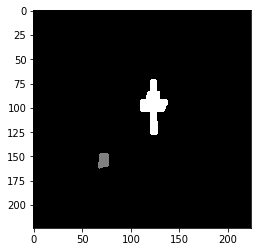

In [116]:
result = np.zeros((224,224,3), np.uint8)

img = img_as_ubyte(img)
twat = np.squeeze(img,axis=2)
plt.imshow(twat, cmap = 'gray')
plt.show()

np.copyto(result[:,:,2],  img[:,:,0])

#showImage(img, cmap='gray')


In [146]:
path = '/home/dan/Desktop/combined_masks'

if os.path.exists(path):
    maskfolders = os.listdir(path)
    print('Number Of MaskFolder: ' + str(len(maskfolders)))
    index = 0
    
    generators = []
    
    while index < len(maskfolders):
        maskfolder = os.path.join(path, maskfolders[index])
        generators.append(ImageDataGenerator().flow_from_directory(maskfolder,  color_mode ='grayscale', target_size=(224,224), batch_size=32 , class_mode=None, shuffle=False, seed=1))
        index += 1
else:
    print ('The following path does not exists:',path)
    
print(generators[0][0].shape)

Number Of MaskFolder: 2
Found 157 images belonging to 1 classes.
Found 18300 images belonging to 1 classes.
(32, 224, 224, 1)


In [ ]:
pred = pred.reshape((3064,224,224,2))
print(testPred.shape)

In [ ]:
def showImage(arr, i, title=None):
    if (title != None):
        plt.title(title)
        
    plt.imshow(arr[i, ..., 0], cmap = 'gray')
    plt.show()
    print(arr[i].shape)

In [ ]:
#black = np.zeros((224,224,1))
        #black[black[:,:,0] == 0] = 1
        #black[(mask1[:,:,0] == 1)|(mask2[:,:,0] == 1)] = 0